In [1]:
from data_loading import preprocess_and_save_audio_in_tensors
preprocess_and_save_audio_in_tensors()

Saved: bed/00176480_nohash_0.wav → train
Saved: bed/004ae714_nohash_0.wav → train
Saved: bed/004ae714_nohash_1.wav → train
Saved: bed/00f0204f_nohash_0.wav → train
Saved: bed/00f0204f_nohash_1.wav → train
Saved: bed/012c8314_nohash_0.wav → train
Saved: bed/012c8314_nohash_1.wav → train
Saved: bed/0132a06d_nohash_0.wav → train
Saved: bed/0135f3f2_nohash_0.wav → train
Saved: bed/0137b3f4_nohash_0.wav → train
Saved: bed/014f9f65_nohash_0.wav → train
Saved: bed/01648c51_nohash_0.wav → train
Saved: bed/01648c51_nohash_1.wav → train
Saved: bed/016e2c6d_nohash_0.wav → train
Saved: bed/01b4757a_nohash_0.wav → train
Saved: bed/01b4757a_nohash_1.wav → train
Saved: bed/01bcfc0c_nohash_0.wav → train
Saved: bed/0227998e_nohash_0.wav → train
Saved: bed/026290a7_nohash_0.wav → validation
Saved: bed/02746d24_nohash_0.wav → train
Saved: bed/035de8fe_nohash_0.wav → train
Saved: bed/0362539c_nohash_0.wav → train
Saved: bed/0362539c_nohash_1.wav → train
Saved: bed/037c445a_nohash_0.wav → train
Saved: bed/

In [1]:
import os
import torch
from torch.utils.data import Dataset
from pathlib import Path

class TorchTensorFolderDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = Path(root_dir)
        self.samples = []
        self.class_to_idx = {}
        self._prepare_file_list()

    def _prepare_file_list(self):
        for class_dir in sorted(self.root_dir.glob("*")):
            if not class_dir.is_dir():
                continue
            class_name = class_dir.name
            if class_name not in self.class_to_idx:
                self.class_to_idx[class_name] = len(self.class_to_idx)
            for file in class_dir.glob("*.pt"):
                self.samples.append((file, self.class_to_idx[class_name]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        tensor = torch.load(path, weights_only=True)
        return tensor, label


from torch.utils.data import DataLoader

# RAW dane
train_raw_dataset = TorchTensorFolderDataset(os.path.join(os.getcwd(),"data\\preprocessed\\raw\\train"))
train_raw_loader = DataLoader(train_raw_dataset, batch_size=16, shuffle=True)

# MEL dane
val_mel_dataset = TorchTensorFolderDataset(os.path.join(os.getcwd(),"data\\preprocessed\\mel\\train"))
val_mel_loader = DataLoader(val_mel_dataset, batch_size=16, shuffle=True)


In [2]:
for waveforms, labels in val_mel_loader:
    print("Waveform batch shape:", waveforms.shape)
    print("Labels:", labels)
    break

Waveform batch shape: torch.Size([16, 1, 64, 81])
Labels: tensor([ 1,  9, 12, 13, 18, 18, 11, 19, 19, 13, 26, 19, 26, 26, 15,  1])


In [3]:
for waveforms, labels in train_raw_loader:
    print("Waveform batch shape:", waveforms.shape)
    print("Labels:", labels)
    break

Waveform batch shape: torch.Size([16, 1, 16000])
Labels: tensor([14, 27,  4,  4, 22,  1, 20, 22, 28,  2, 22,  6, 27, 19,  6, 14])


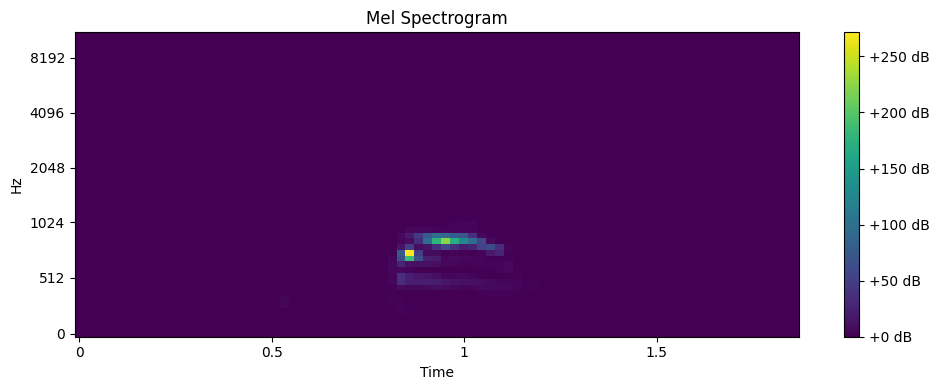

In [4]:
import torch
import matplotlib.pyplot as plt
import librosa.display

# Wczytanie pliku .pt
sample_path = os.path.join(os.getcwd(),"data","preprocessed","mel","train","bed","0a7c2a8d_nohash_0.pt")
mel_spec_batch = torch.load(sample_path, weights_only=True)  # Zastąp 'sciezka_do_pliku.pt' odpowiednią ścieżką

# Zakładając, że mel_spec_batch ma kształt [batch_size, num_mels, num_frames]
# Jeśli masz batch_size=1, wyciągnij mel-spectrogram dla tego jednego elementu
mel_spec = mel_spec_batch[0]  # Wyciąganie pierwszego (i jedynego) elementu batcha

# Przekształć tensor do numpy array, by użyć librosa do wizualizacji
mel_spec_numpy = mel_spec.numpy()

# Wizualizacja
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_numpy, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()


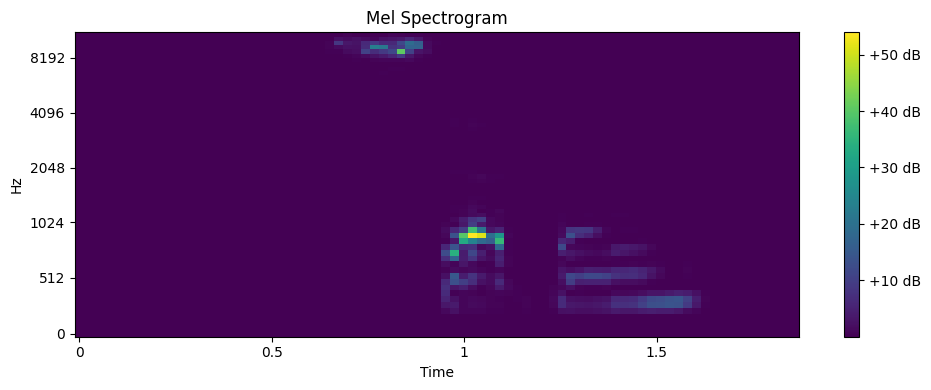

In [5]:
# Wczytanie pliku .pt
sample_path = os.path.join(os.getcwd(),"data","preprocessed","mel","train","seven","0a7c2a8d_nohash_0.pt")
mel_spec_batch = torch.load(sample_path, weights_only=True)  # Zastąp 'sciezka_do_pliku.pt' odpowiednią ścieżką

# Zakładając, że mel_spec_batch ma kształt [batch_size, num_mels, num_frames]
# Jeśli masz batch_size=1, wyciągnij mel-spectrogram dla tego jednego elementu
mel_spec = mel_spec_batch[0]  # Wyciąganie pierwszego (i jedynego) elementu batcha

# Przekształć tensor do numpy array, by użyć librosa do wizualizacji
mel_spec_numpy = mel_spec.numpy()

# Wizualizacja
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_numpy, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()
